# **DROPOUT & BATCH NORMALIZATION**

In [9]:
}from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Deep learning es más que capas densas, hay muchos tipos que capas que se pueden utilizarse en la construcción de un modelo (ver [Keras docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/)), algunas son como las capas densas que definen conexiones entre neuronas, y otras hacen preprocesamiento o transformaciones.

Vamos a ver dos tipos especiales de capas, que no tienen neuronas, pero que añaden funcionalidad en beneficio del modelo de varias formas. Ambas son actualmente utilizadas en arquitecturas.

##**Dropout**

Sirve para corregir el overfitting.

La idea para resolver este problema, es aleatoriatmente eliminar algunas partes de las unidades de entrada en cada paso del entrenamiento, haciendo más difícil para la red aprender esos patrones espurios. De esta forma se buscarán patrones más generales, cuyos pesos serán más robustos.

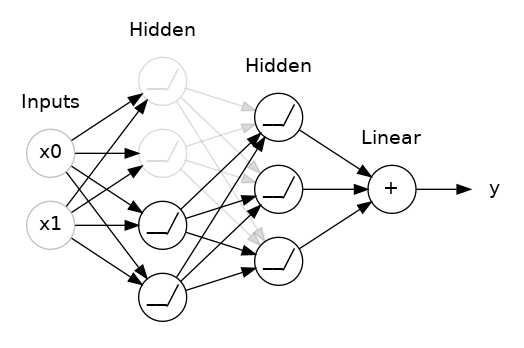

También se puede pensar como un tipo de *ensamble* de redes, donde las predicciones no se hacen por una sola red grande, sino por comité de redes más pequeñas. Cada miembro del comité comete errores, pero no el mismo en un caso particular, por lo que sus decisiones son mejores que la de un sólo individuo (como en el caso del random forest, que se ensamblan árboles de decisión).

###Añadiendo dropout

En Keras, el argumento rate de una capa dropout define qué porcentaje de las unidades de entrada no serán consideradas.

In [2]:
 import numpy as np

 print(np.median (np.array ([10,20,30,40,50])))

30.0


In [ ]:
keras.Sequential ([
   #....
   layers.Dropout (rate=0.3), #aplicar un 30% sin considerar en el siguiente capa
   #....
])

##**Batch Normalization**

La siguiente capa especial nos apoya cuando el entrenamiento es muy lento o inestable.

En general es una buena idea poner todos los datos dentro de una misma escala (como por ejemplo con `StandardScaler` o `MinMaxScaler` de `scikit-learn`. El gradiente descendente cambiará los pesos en proporción a qué tan grande es la activación de los datos, características que tienden a producir activaciones de diferentes tamaños pueden hacer inestable el entrenamiento.

La normalización se puede hacer dentro de la red, el tipo de capa se conoce como **batch normalization layer**. Esta capa normaliza el batch de entrada usando el promedio y la desviación estandar.

En muchas ocasiones el batchnorm se agrega como ayuda en el proceso de optimización. Los modelos con batchnorm tienden a necesitar menos epochs para completar el entrenamiento y pueden  arreglar problemas de estancamiento en el entrenamiento.

Debe considerarse su usao cuando hay problemas durante el entrenamiento, puede usarse en cualquier punto de la red:



In [10]:
#después de una capa
layers.Dense (16, activation = 'relu'),
layers.BatchNormalization (),

(<keras.layers.normalization.batch_normalization.BatchNormalization at 0x7f16ddab2190>,)

In [11]:
#o entre una capa y su función de activación

layers.Dense (16),
layers.BatchNormalization (),
layers.Activation('relu'),

(<keras.layers.core.activation.Activation at 0x7f16dda74810>,)

si se añade como primera capa de la red actua como `StandardScale` de `Sci-Lit Learn`

##Ejemplo - Uso de Dropout y Batch Normalization

Continuemos el desarrollo del modelo *Red Wine*, aumentaremos la capacidad, añadiendo dropout para controlar el overfitting y batch normalization para acelerar la optimización. No se realizará normalización, para ver cómo el batch normalización puede estabilizar el entrenamiento.

In [12]:
import pandas as pd
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/winequality-red.csv"
red_wine = pd.read_csv (path)

#red_wine[index] = ["DSADFSA"]

In [14]:
# Divide en entrenamiento y validación
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Divide en características y objetivo
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


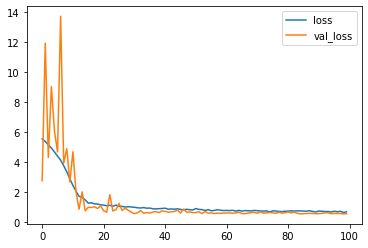

In [15]:
#Cuando se añade dropout, podría requerirse aumentar el número de unidades
#en las capas Dense
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

#No hay cambios en el entrenamiento
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Mostrar las curvas de aprendizaje
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

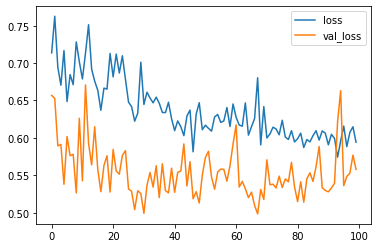

In [16]:
#No hay cambios en el entrenamiento
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Mostrar las curvas de aprendizaje
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [17]:
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.4984


In [ ]:
#Anteriormente se obtuvo lo siguiente (NO EJECUTAR)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], 
    verbose=0,  # apagar los log de entrenamiento
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Mínimo loss en validación: {}".format(history_df['val_loss'].min()))

Por lo general se tiene una mejor ejecución cuando se estandarizan los datos antes de usar el entrenamiento. Haber usado los datos originales, sin embargo, muestra que el batch normalization puede ser efectivo en datasets más complejos.

##Ejercicios

Vamos a mejorar las predicciones del dataset spotify con dropout y batch normalization.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/spotify.csv"
spotify = pd.read_csv (path)

In [ ]:
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X ['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# para mantener a todos los artistas juntos
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity en escala de 0-100, se re-escala del 0-1
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


**Paso 1:** Añadir Dropout al modelo Spotify

Aquí está el último modelo del ejercicio anterior. Añada dos capas dropout, una después de la capa `Dense` con 128 unidades y otra después de la capa `Dense` con 64 unidades. Ponga el `dropout rate` de ambos en `0.3`

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),#Nueva capa Drop
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),#Nueva capa Drop
    layers.Dense(1)
])

Ejecute la siguiente celda para entrenar el modelo y vea el efecto de añadir el Dropout

Minimum Validation Loss: 0.1943


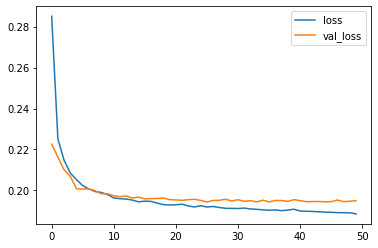

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

**Paso 2:** Evaluar el dropout

Recordemos que el modelo construido anteriormente tendía al overfiting alrededor del epoch 5.

¿Añadir el dropout previno el overfitting?



**Más experimentos** 

Vamos a cambiar y a explorar cómo el batch normalization puede arreglar problemas de entrenamiento.

Leer el dataset del concreto, sin hacer estandarización, se vera el efecto del batch normalization más evidente.

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/concrete_data.csv"
concreto = pd.read_csv (path)

In [ ]:
concreto.head ()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df = concreto.copy()
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('concrete_compressive_strength', axis=1)
X_valid = df_valid.drop('concrete_compressive_strength', axis=1)
y_train = df_train['concrete_compressive_strength']
y_valid = df_valid['concrete_compressive_strength']

input_shape = [X_train.shape[1]]

Ejecute la siguiente celda para entrenar la red con datos no estandarizados

Minimum Validation Loss: nan


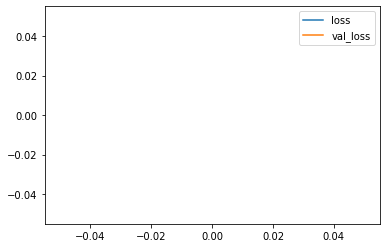

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD es más sensitiva a diferencias en las escalas
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

¿Terminó con una gráfica en blanco?

Entrenar esta red con este dataset normalmente falla, aun cuando converge (debido a una inicialización de pesos con suerte),  tiende a hacerlo en un número muy grande

**Paso 3:** Agregar capas de Batch Normalization

Batch normalization puede ayudar a corregir este tipo de problemas.

Añada cuatro capas `BatchNormalization`, una antes de cada capa `Dense`. Recuerde mover el argumento `input_shape` a la primera capa.


In [ ]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape), #capa BatchNormalitation nueva
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Ejecute la sigiente celda para ver si el batch normalization permite entrenar el modelo

Minimum Validation Loss: 3.9001


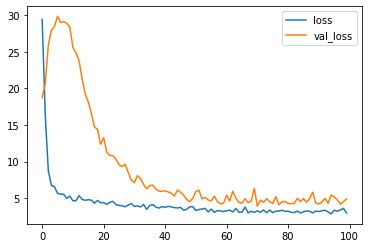

In [ ]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

**Paso 4:** Evaluar

¿Ayudó añadir el batch normalization?